In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update({'font.size':16})

## Glioblastoma stages

In [2]:
glioblastoma = pd.DataFrame(index=['Stage %d'%x for x in range(1,5)],
                            columns=['%d-%d'%(x,x+20) for x in range(0,80,20)],
                            data=[[5,15,30,10],
                                  [10,30,20,22],
                                  [7,10,14,20],
                                  [5,7,12,15]])
glioblastoma.columns.name = 'Age'
glioblastoma

Age,0-20,20-40,40-60,60-80
Stage 1,5,15,30,10
Stage 2,10,30,20,22
Stage 3,7,10,14,20
Stage 4,5,7,12,15


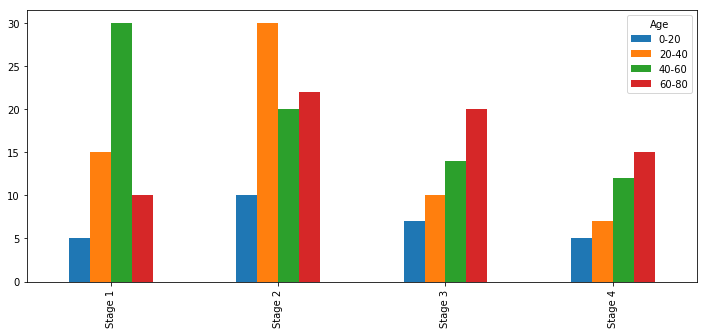

In [3]:
glioblastoma.plot.bar(figsize=(12,5));

### Compute some statistics (but don't show them yet)

In [4]:
from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(glioblastoma)

In [5]:
glioblastoma['Total'] = glioblastoma.sum(axis=1)
glioblastoma.loc['Total'] = glioblastoma.sum(axis=0)
glioblastoma

Age,0-20,20-40,40-60,60-80,Total
Stage 1,5,15,30,10,60
Stage 2,10,30,20,22,82
Stage 3,7,10,14,20,51
Stage 4,5,7,12,15,39
Total,27,62,76,67,232


### Show the expected values, based on the row and column margins and the null hypothesis of independence

In [6]:
glioblastoma_expected = glioblastoma.copy()
glioblastoma_expected.iloc[:4,:4] = expected.round(2)
glioblastoma_expected

Age,0-20,20-40,40-60,60-80,Total
Stage 1,6.98,16.03,19.66,17.33,60
Stage 2,9.54,21.91,26.86,23.68,82
Stage 3,5.94,13.63,16.71,14.73,51
Stage 4,4.54,10.42,12.78,11.26,39
Total,27.00,62.00,76.00,67.00,232


### Show the % deviation between the observed and the expected values

In [7]:
deviation = (100*(glioblastoma - glioblastoma_expected)/glioblastoma_expected).round(1)
deviation

Age,0-20,20-40,40-60,60-80,Total
Stage 1,-28.4,-6.4,52.6,-42.3,0.0
Stage 2,4.8,36.9,-25.5,-7.1,0.0
Stage 3,17.8,-26.6,-16.2,35.8,0.0
Stage 4,10.1,-32.8,-6.1,33.2,0.0
Total,0.0,0.0,0.0,0.0,0.0


### Add a little color to let the positive and negative deviations pop out

In [8]:
import seaborn as sns
cmap = sns.diverging_palette(250, 0, as_cmap=True) # Create a Blue-White-Red colormap
def background(x): # A function that will turn a value into a color
    index = cmap.N*(x+50)/100 # Turn values from -50 to 50 into indices
    index = int(np.clip(index,0,cmap.N-1)) # Restrict those indices from 0 to cmap.N-1 (255 in this case)
    rgb = cmap(index)[:3] # Get an RGB value from that index
    hexx = mpl.colors.rgb2hex(rgb) # Get a hexadecimal strong from that RGB value
    return 'background-color: %s' % hexx # Set the background color for the cell using that hexadecimal string

In [9]:
deviation.style.applymap(background)

Age,0-20,20-40,40-60,60-80,Total
Stage 1,-28.4,-6.4,52.6,-42.3,0
Stage 2,4.8,36.9,-25.5,-7.1,0
Stage 3,17.8,-26.6,-16.2,35.8,0
Stage 4,10.1,-32.8,-6.1,33.2,0
Total,0,0,0,0,0


In [28]:
print("Using a chi-squared test, the p-value for the null hypothesis is %.4f" % p)
alpha = 0.05
print("We can%s reject the null hypothesis at significance threshold alpha = %s" % ("not" if p>=alpha else "",alpha))

Using a chi-squared test, the p-value for the null hypothesis is 0.0180
We can reject the null hypothesis at significance threshold alpha = 0.05


### Reality: all glioblastomas are called grade 4 (brain cancers don't use stages), but lesser gliomas can be lower grades

<hr>

## Concussions

In [10]:
concussions = pd.DataFrame(index=['%d-%d%%'%(x,x+9) for x in range(0,100,10)],
                           columns=['0','1','2','3','4+'],
                           data=[[0,0,0,0,1],
                                 [0,0,0,0,0],
                                 [0,1,0,2,1],
                                 [1,0,0,2,4],
                                 [0,1,1,1,5],
                                 [2,2,1,7,8],
                                 [4,2,1,4,5],
                                 [6,4,4,4,2],
                                 [6,5,5,2,1],
                                 [8,7,6,1,1]])
concussions.columns.name ='# concussions'
concussions

# concussions,0,1,2,3,4+
0-9%,0,0,0,0,1
10-19%,0,0,0,0,0
20-29%,0,1,0,2,1
30-39%,1,0,0,2,4
40-49%,0,1,1,1,5
50-59%,2,2,1,7,8
60-69%,4,2,1,4,5
70-79%,6,4,4,4,2
80-89%,6,5,5,2,1
90-99%,8,7,6,1,1


In [11]:
chi2,p,dof,expected = chi2_contingency(concussions)

ValueError: The internally computed table of expected frequencies has a zero element at (1, 0).

### There is an error because the expected value for the 10-19% case is 0 (since there are no observed cases in that row), therefore the denominator in the chi-squared formula is zero, i.e. the calculation cannot be completed

In [31]:
chi2,p,dof,expected = chi2_contingency(concussions.drop('10-19%'))
print("Using a chi-squared test, the p-value for the null hypothesis is %.4f" % p)
alpha = 0.05
print("We can%s reject the null hypothesis at significance threshold alpha = %s" % ("not" if p>=alpha else "",alpha))

Using a chi-squared test, the p-value for the null hypothesis is 0.0210
We can reject the null hypothesis at significance threshold alpha = 0.05


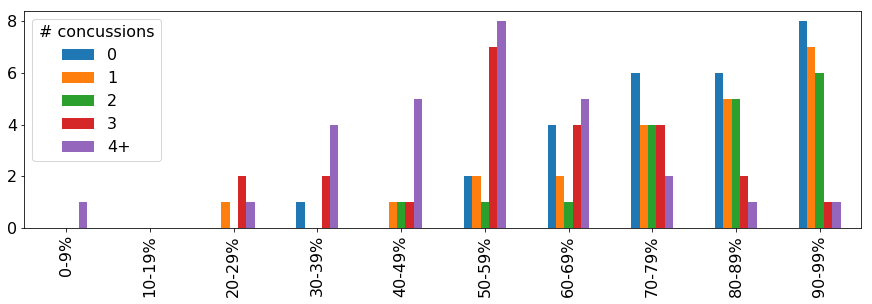

In [33]:
concussions.plot.bar(figsize=(15,4));